In [3]:
# Generazione di un numero reale in un intervallo tra due numeri reali con un simulatore ideale di un circuito quantistico

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
# Parametri iniziali

a = float(input('inserisci a, estremo sx dell\'intervallo\' (reale) : '))
b = float(input('inserisci b, estremo dx dell\'intervallo\'(reale) : '))
d = float(input('inserisci l\'errore massimo desiderato ( < b-a ) : '))

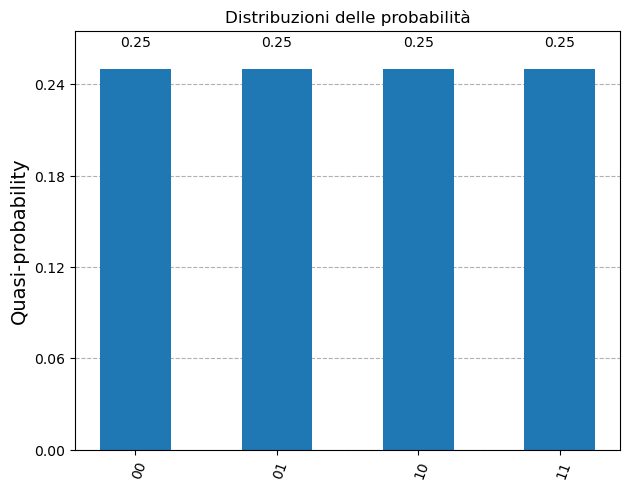

        ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─░─┤M├───
        ├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 


In [ ]:
%matplotlib inline

# Costruzione del vettore di precisione p
num_bit = math.ceil(math.log2((b-a)/d+1)) # numero minimo di bit per rappresentare tutti i numeri reali in [0,(b-a)] a distanza <= d
p = [(1/2)**i for i in range(1,num_bit+1)] 

# Creazione di un circuito quantistico per la generazione di un numero reale casuale in [0,(b-a)]
qc = QuantumCircuit(num_bit)
# aggiunta dei gates di Hadamard in qc
qc.h(qc.qubits)

# Verifica che la probabilità di generare un qualsiasi numero intero in [0,(b-a)] con qc sia uguale per tutti (= 1/(2^(num_bit)) ) 
state = Statevector.from_instruction(qc) 
probs = state.probabilities_dict() 
plot_histogram(probs)
plt.title("Distribuzioni delle probabilità")
plt.show()

# aggiunta dei gate di misurazione in qc
qc.measure_all()
print(qc)

In [ ]:
# Definizione del simulatore ideale del circuito quantistico
simulator = AerSimulator(method = 'statevector') 

# Generazione di un reale nell'intervallo [a,b] 
result = simulator.run(qc, shots=1).result() # risultato generato dal qc
bit_string = list(result.get_counts().keys())[0] # dict_keys -> lista con unico elemento la stringa corrispondente alla configurazione binaria generata da qc
numero_binario = [int(b) for b in bit_string] # lista con una stringa -> lista di valori binari
numero_reale = np.dot(p, numero_binario) # numero_reale nell'intervallo [0,sum(p)]
numero_reale = (numero_reale * 1/sum(p))*(b-a) # numero_reale nell'intervallo [0,b-a]
numero_reale = numero_reale+a # numero_reale nell'intervallo [a,b]
print(f'numero casuale reale tra {a} e {b}: {numero_reale}')


numero casuale reale tra 0.0 e 2.0: 1.3333333333333333


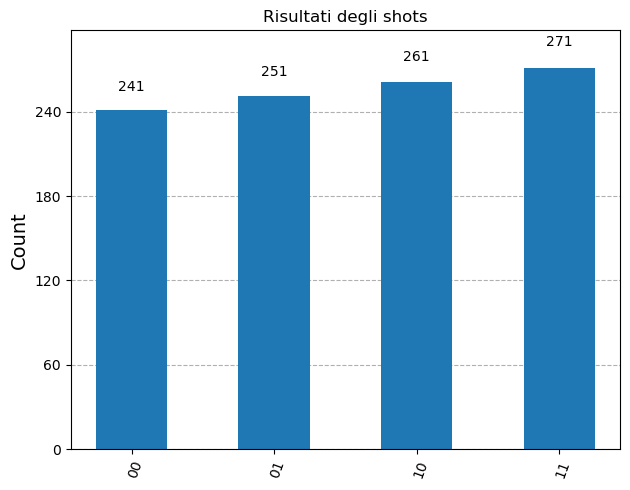

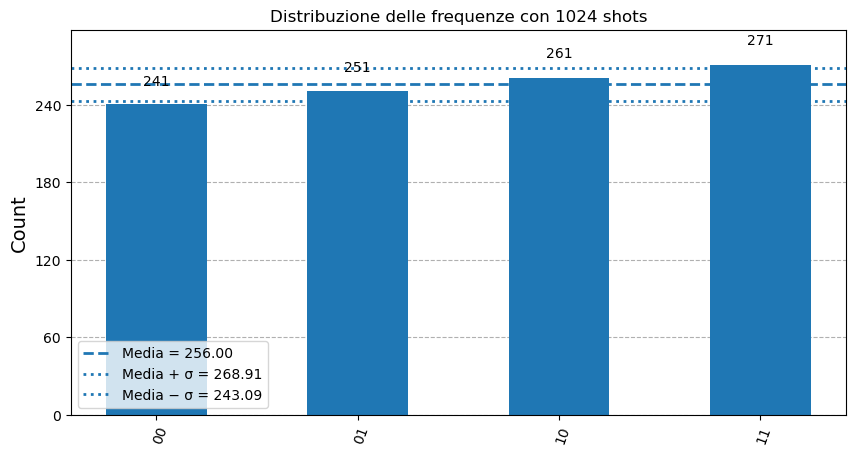

In [ ]:
%matplotlib inline
# Analisi statistica dei risultati 

num_shots = 1024 
result = simulator.run(qc, shots=num_shots).result()  

# Risultati degli shots
counts = result.get_counts() # dizionario: chiavi = configurazioni binarie, valori = frequenze negli shots
# rappresentazione grafica
plot_histogram(counts) 
plt.title("Risultati degli shots")
plt.show()

# Media e deviazione standard delle frequenze delle configurazioni binarie
valori_int = np.array([int(v) for v in counts.values()])
media = np.mean(valori_int)
dev_std = np.std(valori_int, ddof=1)
print(f"Media : {media}" )
print(f"Deviazione standard : {dev_std}")
# rappresentazione grafica
fig, ax = plt.subplots(figsize=(10,5))
plot_histogram(counts, ax=ax)
ax.axhline(media, linestyle='--', linewidth=2, label=f"Media = {media:.2f}")
ax.axhline(media + dev_std, linestyle=':', linewidth=2, label=f"Media + σ = {media+dev_std:.2f}")
ax.axhline(media - dev_std, linestyle=':', linewidth=2, label=f"Media − σ = {media-dev_std:.2f}")
ax.set_title(f"Distribuzione delle frequenze con {num_shots} shots")
ax.legend()
plt.show()